In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/balanced-data/balanced_data.csv


# Using Deep Learning Model to Classification in Sentiment and Scenarios Task

In [18]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline
import torch
from torch.utils.data import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/balanced-data/balanced_data.csv', encoding='ISO-8859-1')
df

,text,sentiment,sentiment_numeric,cleaned_text,work,friend,family,lemmatized_text,stemmed_text
0,btw my last tweet was supposed to say @jackall...,positive,1,btw my last tweet was supposed to say jackallt...,1,0,0,btw my last tweet be suppose to say jackalltim...,NaN
1,thank god the weekend is here. five more days ...,positive,1,thank god the weekend is here five more days ...,1,0,0,thank god the weekend be here five more day ...,NaN
2,2am... still working. at this rate i'll nev...,negative,0,am still working at this rate ill never get...,1,0,0,be still work at this rate ill never get r...,am still work at thi rate ill never get rid of...
3,This is going to be a long ass day of work.,negative,0,this is going to be a long ass day of work,1,0,0,this be go to be a long ass day of work,thi is go to be a long ass day of work
4,Threw out the right side of my back by simply ...,negative,0,threw out the right side of my back by simply ...,1,0,0,throw out the right side of my back by simply ...,threw out the right side of my back by simpli ...
...,...,...,...,...,...,...,...,...,...
89995,@mrhorse The problem is that universities are ...,negative,0,mrhorse the problem is that universities are a...,0,1,1,mrhorse the problem be that university be also...,NaN
89996,@brinckey7 dont bother urself..no students wer...,negative,0,brinckey dont bother urselfno students were al...,0,1,1,brinckey do not bother urselfno student be all...,NaN
89997,"Side feeling better, which I attribute to chic...",positive,1,side feeling better which i attribute to chick...,0,0,1,side feeling well which I attribute to chicken...,NaN
89998,"@ninkompoop picture please, so it will feel li...",positive,1,ninkompoop picture please so it will feel like...,0,0,1,ninkompoop picture please so it will feel like...,NaN


In [3]:
from sklearn.model_selection import train_test_split

X = df['lemmatized_text'] 
y = df[['work', 'friend', 'family']] # Multi-label classification

# Data split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

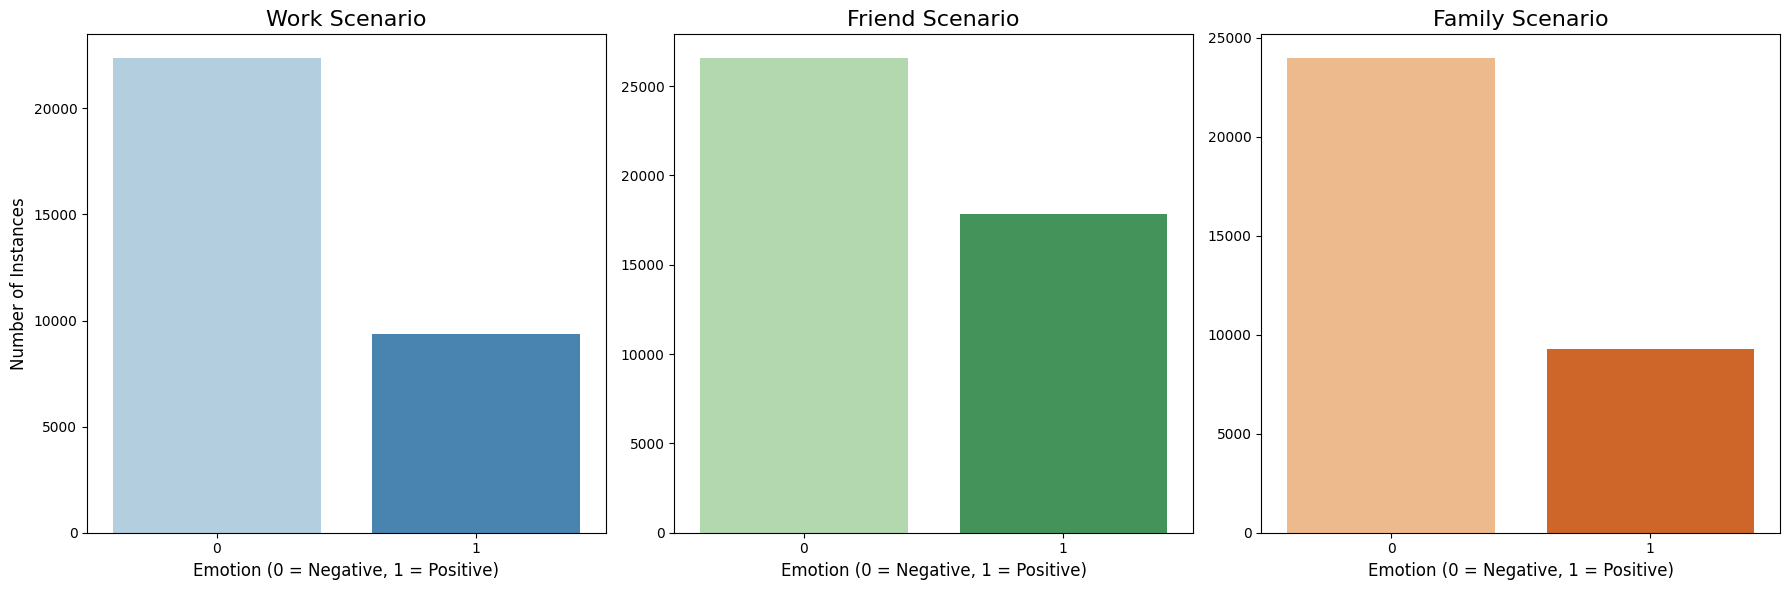

In [81]:
# Count the sentiment distribution for work, friend, and family scenarios
work_emotion_counts = df[df['work'] == 1]['sentiment_numeric'].value_counts()
friend_emotion_counts = df[df['friend'] == 1]['sentiment_numeric'].value_counts()
family_emotion_counts = df[df['family'] == 1]['sentiment_numeric'].value_counts()

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the sentiment distribution for work, friend, and family scenarios
sns.barplot(x=work_emotion_counts.index, y=work_emotion_counts.values, ax=ax[0], palette='Blues')
ax[0].set_title('Work Scenario', fontsize=16)
ax[0].set_xlabel('Emotion (0 = Negative, 1 = Positive)', fontsize=12)
ax[0].set_ylabel('Number of Instances', fontsize=12)

# Plot the sentiment distribution for friend scenario
sns.barplot(x=friend_emotion_counts.index, y=friend_emotion_counts.values, ax=ax[1], palette='Greens')
ax[1].set_title('Friend Scenario', fontsize=16)
ax[1].set_xlabel('Emotion (0 = Negative, 1 = Positive)', fontsize=12)
ax[1].set_ylabel('')

# Plot the sentiment distribution for family scenario
sns.barplot(x=family_emotion_counts.index, y=family_emotion_counts.values, ax=ax[2], palette='Oranges')
ax[2].set_title('Family Scenario', fontsize=16)
ax[2].set_xlabel('Emotion (0 = Negative, 1 = Positive)', fontsize=12)
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

# BERT Model
code from https://huggingface.co/google-bert/bert-base-uncased

In [116]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn import BCEWithLogitsLoss
from sklearn.preprocessing import MultiLabelBinarizer

In [120]:
# Extract text and labels from balanced_df
texts = df['lemmatized_text'].tolist() # Use lemmatized_text as input
labels = df[['work', 'friend', 'family', 'sentiment_numeric']].values  # Multi-label classification

In [125]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [126]:
# Output the shape of the data to ensure correct splitting
print(len(X_train), len(X_test))
print(y_train.shape, y_test.shape)

72000 18000
(72000, 4) (18000, 4)


In [122]:
print(labels.shape)

(90000, 4)


In [123]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [124]:
# Tokenize the texts
def tokenize_data(texts, tokenizer, max_length=64):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=max_length)

train_encodings = tokenize_data(X_train, tokenizer)
test_encodings = tokenize_data(X_test, tokenizer)


In [127]:
print(train_encodings['input_ids'].shape)
print(test_encodings['input_ids'].shape)

torch.Size([72000, 64])
torch.Size([18000, 49])


In [128]:
# Create a Dataset class
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test))

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [129]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [130]:
# Load the pre-trained BERT model, specifying num_labels as 4 (have 4 labels: work, friend, family, sentiment_numeric)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)
model.to(device)  # 将模型移动到 GPU

# Use AdamW as the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [131]:
print(y_train.shape)
print(y_test.shape)

(72000, 4)
(18000, 4)


In [132]:
# Define a training function
def train_multilabel_model(model, train_loader, optimizer, device, epochs = 3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_idx, batch in enumerate(train_loader):
            input_ids, attention_mask, labels = batch
            labels = labels.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            # Clears the gradients of all optimized torch.Tensors
            optimizer.zero_grad()

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            
            # BCEWithLogitsLoss: This loss combines a Sigmoid layer and the BCELoss in one single class
            # Calculates the Binary Cross Entropy between the target and the output
            loss = BCEWithLogitsLoss()(outputs.logits, labels.float())
            loss.backward()

            # Updates the model's parameters
            optimizer.step()

            total_loss += loss.item()

            # Print the loss every 150 batches
            if (batch_idx + 1) % 150 == 0:
                print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader):.4f}")

# Train the model
train_multilabel_model(model, train_loader, optimizer, device)

Epoch 1, Batch 150/4500, Loss: 0.6220
Epoch 1, Batch 300/4500, Loss: 0.4336
Epoch 1, Batch 450/4500, Loss: 0.4965
Epoch 1, Batch 600/4500, Loss: 0.3010
Epoch 1, Batch 750/4500, Loss: 0.5216
Epoch 1, Batch 900/4500, Loss: 0.3277
Epoch 1, Batch 1050/4500, Loss: 0.2419
Epoch 1, Batch 1200/4500, Loss: 0.2499
Epoch 1, Batch 1350/4500, Loss: 0.2873
Epoch 1, Batch 1500/4500, Loss: 0.2723
Epoch 1, Batch 1650/4500, Loss: 0.3525
Epoch 1, Batch 1800/4500, Loss: 0.1321
Epoch 1, Batch 1950/4500, Loss: 0.1560
Epoch 1, Batch 2100/4500, Loss: 0.1824
Epoch 1, Batch 2250/4500, Loss: 0.1802
Epoch 1, Batch 2400/4500, Loss: 0.1905
Epoch 1, Batch 2550/4500, Loss: 0.2142
Epoch 1, Batch 2700/4500, Loss: 0.1992
Epoch 1, Batch 2850/4500, Loss: 0.1670
Epoch 1, Batch 3000/4500, Loss: 0.0901
Epoch 1, Batch 3150/4500, Loss: 0.1465
Epoch 1, Batch 3300/4500, Loss: 0.1976
Epoch 1, Batch 3450/4500, Loss: 0.2166
Epoch 1, Batch 3600/4500, Loss: 0.0979
Epoch 1, Batch 3750/4500, Loss: 0.1789
Epoch 1, Batch 3900/4500, Loss:

In [134]:
# Evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            input_ids, attention_mask, labels = batch
            labels = labels.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.sigmoid(outputs.logits)  # For multi-label, use sigmoid to output probabilities
            predictions = (predictions > 0.5).float()  # 1 if the probability is greater than 0.5, otherwise 0
            
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.numel()

    print(f"Accuracy: {total_correct / total_samples:.4f}")

In [135]:
# Evaluate the model
evaluate_model(model, test_loader, device)

Accuracy: 0.9331


# DistilBERT
code from https://huggingface.co/docs/transformers/model_doc/distilbert

In [137]:
from transformers import DistilBertForSequenceClassification, AdamW

In [138]:
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilbert_model.to(device)

# Use AdamW as the optimizer
distilbert_optimizer = AdamW(distilbert_model.parameters(), lr=1e-5)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
def train_multilabel_model(model, train_loader, optimizer, device, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_idx, batch in enumerate(train_loader):
            input_ids, attention_mask, labels = batch
            labels = labels.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            optimizer.zero_grad()

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = torch.nn.BCEWithLogitsLoss()(logits, labels.float())
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if (batch_idx + 1) % 150 == 0:
                print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader):.4f}")

# Train the DistilBERT model
train_multilabel_model(distilbert_model, train_loader, distilbert_optimizer, device)

Epoch 1, Batch 150/4500, Loss: 0.5793
Epoch 1, Batch 300/4500, Loss: 0.4371
Epoch 1, Batch 450/4500, Loss: 0.3893
Epoch 1, Batch 600/4500, Loss: 0.5445
Epoch 1, Batch 750/4500, Loss: 0.2774
Epoch 1, Batch 900/4500, Loss: 0.3269
Epoch 1, Batch 1050/4500, Loss: 0.3439
Epoch 1, Batch 1200/4500, Loss: 0.1958
Epoch 1, Batch 1350/4500, Loss: 0.3267
Epoch 1, Batch 1500/4500, Loss: 0.3353
Epoch 1, Batch 1650/4500, Loss: 0.2144
Epoch 1, Batch 1800/4500, Loss: 0.1415
Epoch 1, Batch 1950/4500, Loss: 0.1652
Epoch 1, Batch 2100/4500, Loss: 0.2139
Epoch 1, Batch 2250/4500, Loss: 0.1914
Epoch 1, Batch 2400/4500, Loss: 0.1624
Epoch 1, Batch 2550/4500, Loss: 0.3362
Epoch 1, Batch 2700/4500, Loss: 0.2980
Epoch 1, Batch 2850/4500, Loss: 0.1546
Epoch 1, Batch 3000/4500, Loss: 0.4060
Epoch 1, Batch 3150/4500, Loss: 0.1831
Epoch 1, Batch 3300/4500, Loss: 0.4024
Epoch 1, Batch 3450/4500, Loss: 0.1975
Epoch 1, Batch 3600/4500, Loss: 0.2715
Epoch 1, Batch 3750/4500, Loss: 0.1113
Epoch 1, Batch 3900/4500, Loss:

In [141]:
def evaluate_model(model, test_loader, device):
    model.eval()
    total_correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            labels = labels.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.sigmoid(outputs.logits)

            predictions = (predictions > 0.5).float()

            total_correct += (predictions == labels).sum().item()
            total += labels.numel()

    accuracy = total_correct / total
    print(f"Evaluation accuracy: {accuracy:.4f}")


In [142]:
# Evaluate the DistilBERT model
evaluate_model(distilbert_model, test_loader, device)

Evaluation accuracy: 0.9332


# RoBERTa
code from: https://huggingface.co/docs/transformers/model_doc/roberta

In [143]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [144]:
# Load the RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [150]:
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
roberta_model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [169]:
roberta_optimizer = AdamW(roberta_model.parameters(), lr=1e-5)

In [176]:
def train_multilabel_model_roberta(model, train_loader, optimizer, device, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        print(f"Starting Epoch {epoch + 1}")
        
        for batch_idx, batch in enumerate(train_loader):
            # Unzip the batch and get the input_ids, attention_mask and labels respectively
            input_ids, attention_mask, labels = batch
            
            # Move the data to the GPU
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device).float()  # Ensure the labels are of float type
            
            optimizer.zero_grad()

            # Forwards pass to get the outputs
            # outputs.logits
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # BCEWithLogitsLoss: This loss combines a Sigmoid layer and the BCELoss in one single class
            loss = torch.nn.BCEWithLogitsLoss()(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if (batch_idx + 1) % 150 == 0:
                print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader):.4f}")

# Train the RoBERTa model
train_multilabel_model_roberta(roberta_model, train_loader, roberta_optimizer, device)

Starting Epoch 1
Epoch 1, Batch 150/4500, Loss: 0.5498
Epoch 1, Batch 300/4500, Loss: 0.3929
Epoch 1, Batch 450/4500, Loss: 0.3716
Epoch 1, Batch 600/4500, Loss: 0.2176
Epoch 1, Batch 750/4500, Loss: 0.2219
Epoch 1, Batch 900/4500, Loss: 0.1974
Epoch 1, Batch 1050/4500, Loss: 0.2977
Epoch 1, Batch 1200/4500, Loss: 0.3389
Epoch 1, Batch 1350/4500, Loss: 0.2067
Epoch 1, Batch 1500/4500, Loss: 0.1589
Epoch 1, Batch 1650/4500, Loss: 0.2567
Epoch 1, Batch 1800/4500, Loss: 0.2220
Epoch 1, Batch 1950/4500, Loss: 0.1667
Epoch 1, Batch 2100/4500, Loss: 0.2167
Epoch 1, Batch 2250/4500, Loss: 0.1911
Epoch 1, Batch 2400/4500, Loss: 0.2201
Epoch 1, Batch 2550/4500, Loss: 0.4376
Epoch 1, Batch 2700/4500, Loss: 0.2846
Epoch 1, Batch 2850/4500, Loss: 0.1465
Epoch 1, Batch 3000/4500, Loss: 0.1916
Epoch 1, Batch 3150/4500, Loss: 0.3207
Epoch 1, Batch 3300/4500, Loss: 0.1276
Epoch 1, Batch 3450/4500, Loss: 0.3736
Epoch 1, Batch 3600/4500, Loss: 0.1219
Epoch 1, Batch 3750/4500, Loss: 0.2332
Epoch 1, Batch

In [180]:
def evaluate_roberta(model, test_loader, device):
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device).float() 
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = torch.nn.BCEWithLogitsLoss()(outputs.logits, labels)
            total_eval_loss += loss.item()

            predictions = torch.round(torch.sigmoid(outputs.logits))
            accuracy = (predictions == labels).float().mean()
            total_eval_accuracy += accuracy.item()

    # Calculate the average loss and accuracy
    avg_accuracy = total_eval_accuracy / len(test_loader)
    avg_loss = total_eval_loss / len(test_loader)
    
    print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {avg_accuracy:.4f}")


In [181]:
# Evaluate the RoBERTa model
evaluate_roberta(roberta_model, test_loader, device)

Validation Loss: 0.1576, Validation Accuracy: 0.9427


## Compare the Accuracy of Deep Learning Models and Choose the Best One

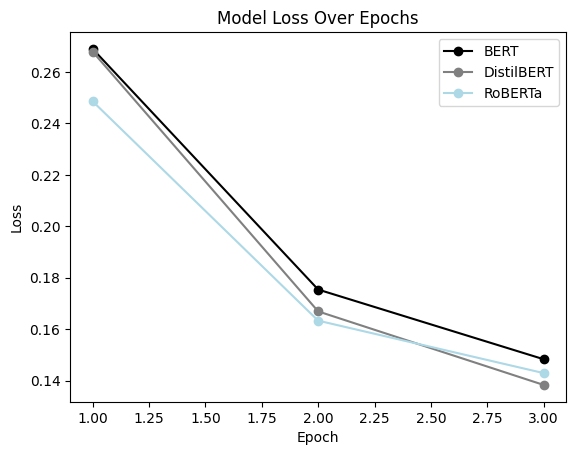

In [201]:
import matplotlib.pyplot as plt


bert_losses = [0.2690, 0.1754, 0.1483] 
distilbert_losses = [0.2679, 0.1669, 0.1383]
roberta_losses = [0.2486, 0.1633, 0.1429]

# 3 epochs
epochs = [1, 2, 3]

# Plot the line chart for the BERT model
plt.plot(epochs, bert_losses, marker='o', label='BERT', color='black')

# Plot the line chart for the DistilBERT model
plt.plot(epochs, distilbert_losses, marker='o', label='DistilBERT', color='gray')

# Plot the line chart for the RoBERTa model
plt.plot(epochs, roberta_losses, marker='o', label='RoBERTa', color='#ADD8E6')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

plt.show()

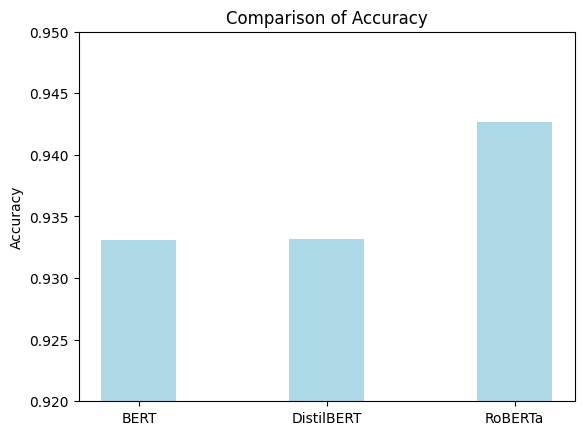

In [198]:
models = ['BERT', 'DistilBERT', 'RoBERTa']

accuracy_values = [0.9331, 0.9332, 0.9427]

fig, ax = plt.subplots()

ax.bar(models, accuracy_values, color='#ADD8E6', width=0.4)

# Set the y-axis label and adjust the y-axis range to emphasize the differences
ax.set_ylabel('Accuracy', color='black')
ax.set_ylim([0.92, 0.95]) # Adjust the y-axis range

plt.title('Comparison of Accuracy')

plt.show()

In [199]:
# Save the RoBERTa model'./roberta_saved_model'
save_directory = './roberta_saved_model'

# Save the RoBERTa model
roberta_model.save_pretrained(save_directory)

# Save the RoBERTa tokenizer
roberta_tokenizer.save_pretrained(save_directory)

('./roberta_saved_model/tokenizer_config.json',
 './roberta_saved_model/special_tokens_map.json',
 './roberta_saved_model/vocab.json',
 './roberta_saved_model/merges.txt',
 './roberta_saved_model/added_tokens.json')

# Code Reference List
Hugging Face (n.d.). DistilBERT. [online] huggingface.co. Available at: https://huggingface.co/docs/transformers/model_doc/distilbert [Accessed 16 Sep. 2024].Hugging Face (2024). google-bert/bert-base-uncased · 

Hugging Face. [online] huggingface.co. Available at: https://huggingface.co/google-bert/bert-base-uncased.

Hugging Face (n.d.). RoBERTa. [online] huggingface.co. Available at: https://huggingface.co/docs/transformers/model_doc/roberta [Accessed 16 Sep. 2024].